In [1]:
import numpy as np
import kwant
import kwant.continuum

In [2]:
a = 10       # lattice constant
L_y = 50    # length along y
b = 30     # width of proximity effect region
c = 20     # width of middle sc region

In [3]:
kinetic = '(k_y^2 + k_x^2 - mu) * kron(sigma_0, sigma_z)'
soc_x = ' - alpha * kron(sigma_y, sigma_z) * k_x'
soc_y = ' + alpha * kron(sigma_x, sigma_z) * k_y'
sc = ' + Delta(x, y) * ( cos( phi(x, y)) * kron(sigma_0, sigma_x) \
       + sin(phi(x, y)) * kron(sigma_0, sigma_y))'

In [4]:
norm_str = kinetic + soc_x + soc_y
sc_str = kinetic + soc_x + soc_y + sc

In [5]:
def top_sc(x, y): return y >= b/2
def bot_sc(x, y): return y <= -b/2
def middle_sc(x, y): return -c/2 < y < c/2 and x != 0


def shape_total(site):
    x, y = site.pos
    return abs(y) <= L_y/2

def Delta_fn(x, y):
    if middle_sc(x, y) or top_sc(x, y):
        return 1
    else:
        return 0

def phi_fn(x, y):
    if top_sc(x, y):
        return np.pi/3
    elif bot_sc(x, y):
        return -np.pi/3
    else:
        return 0

<ipython-input-6-ebfdc13d0239>:12: RuntimeWarning: Kwant's plotting functions have
the side effect of selecting the matplotlib backend. To avoid this warning,
import matplotlib.pyplot, matplotlib.backends or call matplotlib.use().
  kwant.plot(syst, site_color=site_color);


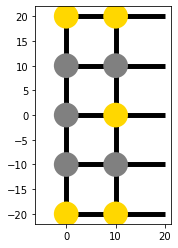

In [6]:
sc_templ = kwant.continuum.discretize(sc_str, grid=a)
syst = kwant.Builder(kwant.TranslationalSymmetry([2*a, 0]))
syst.fill(sc_templ, shape=shape_total, start=(0, 0));

def site_color(site):
    x, y = site.pos
    if any([middle_sc(x, y), top_sc(x, y), bot_sc(x, y)]):
        return 'gold'
    else:
        return 'grey'

kwant.plot(syst, site_color=site_color);

In [7]:
syst = kwant.wraparound.wraparound(syst)
syst = syst.finalized()

In [8]:
params = {
    'mu': 2,
    'Delta': Delta_fn,
    'alpha': 50,
    'k_x': 0,
    'phi': phi_fn,
    'cos': np.cos,
    'sin': np.sin,
}

In [9]:
ham = syst.hamiltonian_submatrix(params=dict(params, k_x=np.pi))
np.diff(np.linalg.eigvalsh(ham))[::2]

array([1.45769300e-05, 7.29509228e-06, 1.55322844e-05, 8.93555919e-05,
       9.66729128e-05, 1.89305342e-04, 4.51543115e-05, 1.02280275e-04,
       1.42523278e-04, 1.30783966e-04, 1.30783966e-04, 1.42523278e-04,
       1.02280275e-04, 4.51543115e-05, 1.89305342e-04, 9.66729128e-05,
       8.93555919e-05, 1.55322844e-05, 7.29509228e-06, 1.45769300e-05])

In [10]:
ham = syst.hamiltonian_submatrix(params=dict(params, k_x=0))
np.diff(np.linalg.eigvalsh(ham))[::2]

array([9.76996262e-15, 8.88178420e-16, 5.32907052e-15, 2.66453526e-15,
       8.88178420e-16, 8.88178420e-16, 8.88178420e-16, 1.11022302e-15,
       7.77156117e-16, 5.55111512e-16, 1.22124533e-15, 7.77156117e-16,
       4.21884749e-15, 1.11022302e-15, 2.22044605e-15, 1.77635684e-15,
       8.88178420e-16, 2.66453526e-15, 8.88178420e-16, 0.00000000e+00])